# 📌 Importação de bibliotecas essenciais:
pandas (pd): manipulação e análise de dados tabulares (DataFrames).

numpy (np): suporte a operações numéricas, vetores e arrays.

matplotlib.pyplot (plt): criação de gráficos estáticos.

seaborn (sns): visualizações estatísticas com base no Matplotlib, com gráficos mais sofisticados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#📊 Descrição do Dataset vgsales.csv:

Este conjunto de dados contém informações sobre vendas de jogos de videogame em diferentes regiões do mundo. Ele é amplamente utilizado para análises de mercado e estudos sobre a indústria dos games. Cada linha representa um jogo específico com suas respectivas informações.

🧾 Colunas do DataFrame:
Coluna	Descrição
Rank	Posição do jogo no ranking de vendas globais.
Name	Nome do jogo.
Platform	Plataforma (console) em que o jogo foi lançado (ex: PS2, Wii, X360).
Year	Ano de lançamento do jogo.
Genre	Gênero do jogo (ex: Sports, Action, Puzzle).
Publisher	Empresa responsável pela publicação do jogo.
NA_Sales	Vendas na América do Norte (em milhões de unidades).
EU_Sales	Vendas na Europa (em milhões de unidades).
JP_Sales	Vendas no Japão (em milhões de unidades).
Other_Sales	Vendas em outras regiões (em milhões de unidades).
Global_Sales	Vendas globais totais (em milhões de unidades).

#🔢 Informações gerais:
Número total de entradas: 16.598 jogos.

Métricas de vendas estão expressas em milhões de cópias.

Os dados abrangem jogos de várias gerações de consoles, desde a década de 1980 até 2016.

Este dataset é ideal para responder perguntas como:

Quais jogos ou gêneros vendem mais?

Qual publisher é mais dominante?

Qual plataforma teve maior impacto nas vendas?

Como as vendas se distribuem entre continentes?


In [2]:
df=pd.read_csv("/content/vgsales.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/vgsales.csv'

#Estrutura geral:
Entradas totais: 16.598 linhas (jogos).

Colunas: 11, com diferentes tipos de dados.

🔍 Tipos de dados:
int64: 1 coluna (Rank)

float64: 6 colunas (vendas e ano de lançamento)

object (strings): 4 colunas (Name, Platform, Genre, Publisher)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##Verificação de valores nulos no dataset (df.isnull().sum())
###Identificamos a presença de dados faltantes em duas colunas:

Year: 271 valores nulos

Publisher: 58 valores nulos

As demais colunas não apresentam valores ausentes, indicando que a maioria dos registros está completa para análise.

Essa informação orienta o tratamento dos dados faltantes nas próximas etapas do projeto.

In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#Identificação dos índices com valores nulos na coluna Year
###Essa linha filtra os registros onde a coluna Year está ausente (NaN) e armazena os índices dessas linhas na variável index_ano.
Esse passo prepara os dados para remoção ou tratamento posterior dessas linhas incompletas.

In [ ]:
index_ano=df[df["Year"].isnull()].index
index_ano

Index([  179,   377,   431,   470,   607,   624,   649,   652,   711,   782,
       ...
       16191, 16194, 16198, 16229, 16246, 16307, 16327, 16366, 16427, 16493],
      dtype='int64', length=271)

#Remoção das linhas com ano (Year) ausente
Essa linha remove do DataFrame todas as linhas cujos índices estão em index_ano, ou seja, exclui os registros com valor nulo na coluna Year.
Isso garante que análises temporais (por ano ou década) não sejam afetadas por dados incompletos.

In [ ]:
df=df[~df.index.isin(index_ano)]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#Atualização: Verificação final de valores nulos
###Após a remoção dos registros sem ano (Year), restam agora 36 valores nulos na coluna Publisher.
Resumo:

✅ Todas as colunas, exceto Publisher, estão completas.

⚠️ A coluna Publisher ainda precisa de tratamento para lidar com os registros faltantes (nulos).

🧼 Esse será o próximo passo no processo de limpeza dos dados.

Pode enviar a próxima célula.

In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,36
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#Conversão de tipo de dado da coluna Year:
### Objetivo:
Remover registros com o ano (Year) ausente e garantir a tipagem correta da coluna.

Etapas realizadas:

df = df[~df.index.isin(index_ano)].copy(): Remove as linhas onde o ano está ausente (índices previamente identificados).

df["Year"] = df["Year"].astype("Int64"): Converte a coluna Year para o tipo Int64 (suporta valores nulos, diferente de int64 puro).

Resultado:
O DataFrame agora não possui mais valores nulos na coluna Year e está com o tipo ideal para análises numéricas que envolvem anos.

In [ ]:
df = df[~df.index.isin(index_ano)].copy()
df["Year"] = df["Year"].astype("Int64")


 # Verificação de Duplicatas
 Resultado:
0 (como np.int64(0))

Interpretação:
O DataFrame não contém linhas duplicadas — ou seja, não há registros idênticos entre si em todas as colunas. Isso assegura que cada entrada no conjunto de dados é única, evitando enviesamentos em análises estatísticas ou visuais.

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,36
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


 # Tratamento de Valores Ausentes — Coluna Publisher
 ### O que foi feito:

Os 36 valores ausentes na coluna Publisher foram substituídos por 0.

Isso garante que a coluna fique livre de valores nulos, facilitando análises posteriores.

### Nota:
Esse valor 0 será posteriormente convertido para uma string mais representativa como "Desconhecido", garantindo melhor legibilidade dos dados durante visualizações e agrupamentos.

In [ ]:
df.loc[:,"Publisher"]=df["Publisher"].fillna(0)


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# Ajuste na Coluna Publisher — Substituição de Valores Ausentes
Descrição:
Foi criada a função categorizando_publisher para transformar os valores 0 (usados para preencher os nulos) em uma string mais informativa "Desconhecido".

# Objetivo:
Garantir que todos os valores da coluna Publisher sejam strings legíveis, facilitando a interpretação dos dados e a visualização, especialmente para valores originalmente ausentes.

In [ ]:
def categorizando_publisher(x):
  if x==0:
    return "Desconhecido"
  else:
    return x

In [ ]:
df.loc[:,"Publisher"]=df["Publisher"].apply(categorizando_publisher)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Distribuição dos Principais Publishers
###Resumo:
A coluna Publisher contém os nomes das empresas responsáveis pela publicação dos jogos. Os 60 publishers mais frequentes estão listados abaixo, mostrando os principais players do mercado em termos de quantidade de jogos publicados no dataset.

Top 5 Publishers mais frequentes:

Electronic Arts — 1.339 jogos

Activision — 966 jogos

Namco Bandai Games — 928 jogos

Ubisoft — 918 jogos

Konami Digital Entertainment — 823 jogos

### Observação:
O valor "Desconhecido" representa as entradas originalmente nulas na coluna Publisher e corresponde a 36 registros.

In [ ]:
df["Publisher"].value_counts().head(60)

,count
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,632


#Estatísticas Descritivas do Dataset
##O método describe() apresenta um resumo estatístico das colunas numéricas do dataset:

Rank: Varia de 1 a 16.600, com média ~8.293 (posição do jogo no ranking de vendas).

Year: Jogos datam de 1980 até 2020, média próxima de 2006.

Vendas por região (milhões de unidades):

NA_Sales (América do Norte): média 0,27; máximo 41,49

EU_Sales (Europa): média 0,15; máximo 29,02

JP_Sales (Japão): média 0,08; máximo 10,22

Other_Sales (Outras regiões): média 0,05; máximo 10,57

Global_Sales: média de 0,54 milhões, com máximo de 82,74 milhões (jogo mais vendido).

##Observação: A distribuição das vendas é bastante assimétrica, evidenciada pela média estar distante dos quartis e máximos muito elevados.

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# O comando df_clean = df cria uma nova referência ao DataFrame original, ou seja, df_clean e df apontam para o mesmo objeto.

Em seguida, df_clean.reset_index(drop=True, inplace=True) redefine os índices do DataFrame, descartando o índice antigo (drop=True), e aplica a alteração diretamente no objeto (inplace=True).
Isso reorganiza os índices sequencialmente de 0 até o tamanho do DataFrame, facilitando manipulações futuras sem a influência do índice anterior.

In [ ]:
df_clean=df


In [ ]:
df_clean.reset_index(drop=True,inplace=True)
df_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada,Publisher_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010,Conhecida
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990,Conhecida
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010,Conhecida
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010,Conhecida
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000,Conhecida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16055,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2000-2010,Desconhecida
16056,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2000-2010,Conhecida
16057,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2000-2010,Conhecida
16058,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,2000-2010,Desconhecida


df_clean.info() exibe um resumo do DataFrame df_clean, mostrando o número de entradas, colunas, tipos de dados, contagem de valores não nulos e uso de memória.

Essa chamada serve para confirmar que, após o reset do índice, os dados permanecem intactos e que não houve alterações inesperadas nas colunas ou nos tipos de dados.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


O comando corr=df_clean.corr(numeric_only=True) calcula a matriz de correlação entre as variáveis numéricas do DataFrame df_clean.

Essa matriz indica o grau de relação linear entre os pares de colunas numéricas, com valores variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita). Valores próximos de 0 indicam pouca ou nenhuma correlação linear.

Esse resultado ajuda a entender como as vendas nas diferentes regiões e outras variáveis numéricas se relacionam entre si.

In [ ]:
corr=df_clean.corr(numeric_only=True)
corr

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.400328,-0.379024,-0.269138,-0.332521,-0.426880
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.400328,-0.091402,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,-0.379024,0.006014,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.269138,-0.169316,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,-0.332521,0.041058,0.634508,0.726266,0.290653,1.000000,0.747974
Global_Sales,-0.426880,-0.074735,0.941268,0.903271,0.612794,0.747974,1.000000


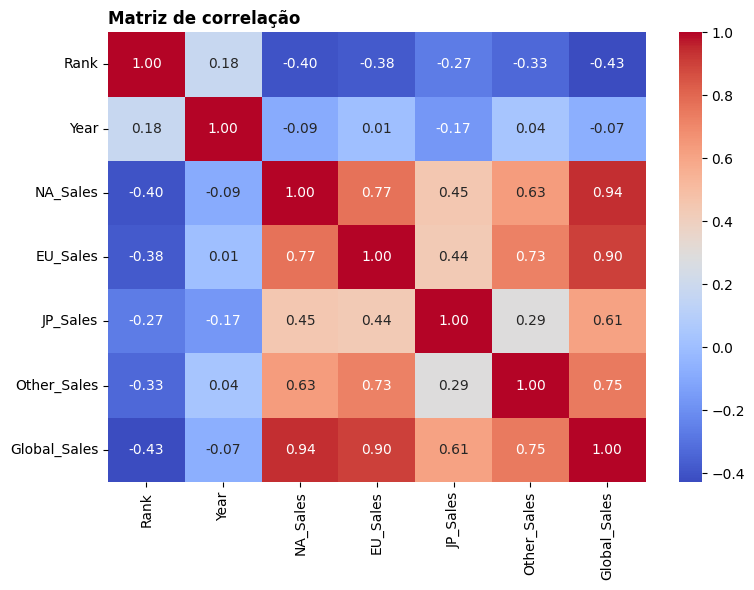

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação', fontweight='bold', loc='left')
plt.tight_layout()
plt.show()

#1. Rank
### Correlação negativa com todas as variáveis de vendas:

Global_Sales (-0.43)

NA_Sales (-0.40)

EU_Sales (-0.38)

Isso indica que quanto maior o volume de vendas, melhor a posição no ranking (menor valor de Rank → melhor colocação).

Correlação fraca com o Year (0.18): não há uma relação forte entre o ano de lançamento e a posição no ranking.

#2. Year
###Pouca correlação com as vendas:

Leve correlação negativa com JP_Sales (-0.17)

Quase nula com EU_Sales (0.006)

Interpretação: o ano de lançamento não influencia significativamente os volumes de venda, exceto uma leve queda nas vendas no Japão com o tempo.

#3. Vendas Regionais
###Fortes correlações positivas entre as regiões:

NA_Sales e EU_Sales: 0.77

NA_Sales e Global_Sales: 0.94

EU_Sales e Global_Sales: 0.90

JP_Sales e Global_Sales: 0.61

Isso mostra que quando um jogo vende bem em uma região, é provável que ele também venda bem em outras.

A contribuição das vendas na América do Norte (NA_Sales) e Europa (EU_Sales) tem maior impacto nas vendas globais.

#4. Global_Sales
###Altamente correlacionada com todas as vendas regionais:

Especialmente com NA_Sales (0.94) e EU_Sales (0.90)

Mostra que essas duas regiões são as principais responsáveis pelo total de vendas globais.



#📊 Conclusão
O Ranking dos jogos melhora (número menor) quanto maior for o total de vendas.

As vendas nas diferentes regiões estão fortemente relacionadas entre si, especialmente entre América do Norte e Europa.

Vendas globais são fortemente influenciadas pelas vendas em NA e EU.

O ano de lançamento tem pouca influência sobre as vendas e o desempenho geral do jogo.



#Aqui, as colunas categóricas Name, Platform, Genre e Publisher do DataFrame df_clean estão sendo convertidas para o tipo string.

Isso facilita o tratamento dessas colunas como dados textuais, melhorando operações como filtragem, agrupamentos ou análises que envolvam variáveis categóricas.

In [ ]:
  df_clean[["Name", "Platform", "Genre", "Publisher"]] = df_clean[["Name", "Platform", "Genre", "Publisher"]].astype("string")


#Conversão de colunas categóricas para tipo string

As colunas Name, Platform, Genre e Publisher foram convertidas para o tipo string[python]. Essa mudança otimiza o armazenamento e manipulação dos dados textuais, garantindo melhor compatibilidade para análises e operações que envolvam valores categóricos.

In [ ]:
print(df_clean[["Name", "Platform", "Genre", "Publisher"]].dtypes)


Name         string[python]
Platform     string[python]
Genre        string[python]
Publisher    string[python]
dtype: object


### Conferindo os tipos de dados novamente

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16060 entries, 0 to 16059
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            16060 non-null  int64  
 1   Name            16060 non-null  string 
 2   Platform        16060 non-null  string 
 3   Year            16060 non-null  Int64  
 4   Genre           16060 non-null  string 
 5   Publisher       16060 non-null  string 
 6   NA_Sales        16060 non-null  float64
 7   EU_Sales        16060 non-null  float64
 8   JP_Sales        16060 non-null  float64
 9   Other_Sales     16060 non-null  float64
 10  Global_Sales    16060 non-null  float64
 11  Decada          16060 non-null  object 
 12  Publisher_Type  16060 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(2), string(4)
memory usage: 1.6+ MB


## Primeiramente vamos analisar quais características de jogos vendem bem em NA e EU

In [ ]:
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada,Publisher_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010,Conhecida
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990,Conhecida
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010,Conhecida
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010,Conhecida
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000,Conhecida


#Análise das Principais Publishers por Plataforma
Objetivo: Identificar, para cada plataforma, a publisher com maior soma de vendas globais.

### Procedimento:

Agrupamento dos dados por Platform e Publisher, somando as vendas globais (Global_Sales).

Para cada plataforma, seleciona-se a publisher com maior valor agregado em vendas.

Ordena-se essas publishers pelas maiores vendas e seleciona-se as top 20.

###Resultado:
Uma tabela com as 20 plataformas e suas respectivas publishers líderes em vendas globais, destacando que Nintendo e Electronic Arts dominam a maioria das plataformas.

In [ ]:


# Agrupar por Platform e Publisher, somando as vendas globais
grouped = df_clean.groupby(['Platform', 'Publisher'], as_index=False)['Global_Sales'].sum()

# Para cada plataforma, pegar a publisher com mais vendas
top_publisher_per_platform = grouped.sort_values('Global_Sales', ascending=False).groupby('Platform').head(1)

# Ordenar pelos maiores totais de vendas e pegar os top 20
top_20 = top_publisher_per_platform.sort_values('Global_Sales', ascending=False).head(20)

# Resultado
print(top_20[['Platform', 'Publisher', 'Global_Sales']])


     Platform                    Publisher  Global_Sales
1501      Wii                     Nintendo        390.34
236        DS                     Nintendo        348.03
855       PS2              Electronic Arts        244.21
312        GB                     Nintendo        228.71
770        PS  Sony Computer Entertainment        192.56
521       NES                     Nintendo        183.97
1605     X360              Electronic Arts        172.80
1009      PS3              Electronic Arts        167.09
80        3DS                     Nintendo        156.45
498       N64                     Nintendo        129.62
373       GBA                     Nintendo        110.94
1414     SNES                     Nintendo         96.84
434        GC                     Nintendo         79.00
567        PC              Electronic Arts         70.30
1562     WiiU                     Nintendo         56.89
1692       XB              Electronic Arts         56.30
1098      PS4              Elec

#Análise das Vendas por Gênero e Publisher nas Regiões NA e EU
Objetivo: Identificar os gêneros e publishers com maiores vendas nas regiões América do Norte (NA) e Europa (EU).

###Procedimento:

Agrupamento dos dados por Genre e Publisher, somando as vendas em NA e EU (NA_Sales e EU_Sales).

Ordenação dos resultados em ordem decrescente, priorizando vendas em NA e, em seguida, em EU.

Seleção dos top 50 combinações de gênero e publisher com maiores vendas.

###Resultado:
A tabela revela que gêneros como Sports, Platform e Shooter dominam as vendas, com publishers como Electronic Arts, Nintendo e Activision liderando os mercados da América do Norte e Europa.



In [ ]:
df_grouped=df_clean.groupby(["Genre","Publisher"],as_index=False)[["NA_Sales","EU_Sales"]].sum()
df_grouped_sorted=df_grouped.sort_values(by=["NA_Sales","EU_Sales"],ascending=False)
top_50_genre=df_grouped_sorted.head(50)
top_50_genre.reset_index(drop=True,inplace=True)
top_50_genre

,Genre,Publisher,NA_Sales,EU_Sales
0,Sports,Electronic Arts,263.50,144.14
1,Platform,Nintendo,219.46,84.90
2,Shooter,Activision,159.15,96.86
3,Role-Playing,Nintendo,105.63,63.92
4,Action,Take-Two Interactive,101.45,70.44
5,Sports,Nintendo,98.77,66.18
6,Action,Activision,86.83,39.99
7,Shooter,Electronic Arts,81.15,56.03
8,Racing,Electronic Arts,75.52,51.20
9,Racing,Nintendo,73.55,39.75


#Frequência dos Gêneros no Top 50 de Vendas NA/EU por Publisher
###Objetivo:
Quantificar a presença de cada gênero entre as 50 combinações de gênero e publisher com maiores vendas na América do Norte e Europa.

###Resultado:
O gênero Action é o mais frequente, aparecendo 13 vezes, seguido por Shooter (7), Sports (6), e Platform (5). Gêneros como Puzzle e Fighting aparecem com menor frequência.

In [ ]:
top_50_genre["Genre"].value_counts()

,count
Genre,
Action,13
Shooter,7
Sports,6
Platform,5
Misc,5
Role-Playing,4
Racing,4
Simulation,3
Fighting,2


#Comparação de Vendas por Gênero nas Regiões EU e NA
Objetivo: Identificar os gêneros com maior impacto nas vendas na Europa (EU) em comparação com a América do Norte (NA).

###Método:
Soma das vendas agrupadas por gênero, utilizando as 50 maiores combinações de gênero e publisher.

###Resultado:

O gênero Action lidera as vendas em ambas as regiões, com 428,53 milhões na EU e 688,60 milhões na NA.

Outros gêneros relevantes incluem Sports, Shooter e Platform, todos com vendas significativamente maiores na NA em relação à EU.

Gêneros como Fighting e Puzzle têm menor participação, especialmente na EU.



In [ ]:
# verificando o genero mais influente no EU
top_50_eu=top_50_genre.groupby("Genre")["EU_Sales"].sum()
top_50_na=top_50_genre.groupby("Genre")["NA_Sales"].sum()

top_50_comparison={
    "EU_Sales":top_50_eu,
    "NA_Sales":top_50_na,
}
comparison_sales=pd.DataFrame(top_50_comparison).sort_values(by=["EU_Sales","EU_Sales"],ascending=False).reset_index()
comparison_sales

,Genre,EU_Sales,NA_Sales
0,Action,428.53,688.60
1,Sports,282.94,526.88
2,Shooter,244.46,452.17
3,Platform,155.84,355.62
4,Misc,144.96,225.23
5,Racing,135.46,218.85
6,Role-Playing,117.36,188.06
7,Simulation,73.55,101.60
8,Fighting,29.22,69.73
9,Puzzle,26.42,55.74


#Visualização: Comparação de Vendas por Gênero entre Europa e América do Norte
O gráfico de barras empilhadas apresenta as vendas totais dos gêneros de jogos nas regiões EU (em azul) e NA (em verde).

Cada barra mostra a soma das vendas em ambas regiões para o gênero correspondente.

Valores são anotados dentro das barras para facilitar a leitura dos totais por região.

Destaca visualmente a predominância da América do Norte nas vendas, especialmente em gêneros como Action, Sports e Shooter.

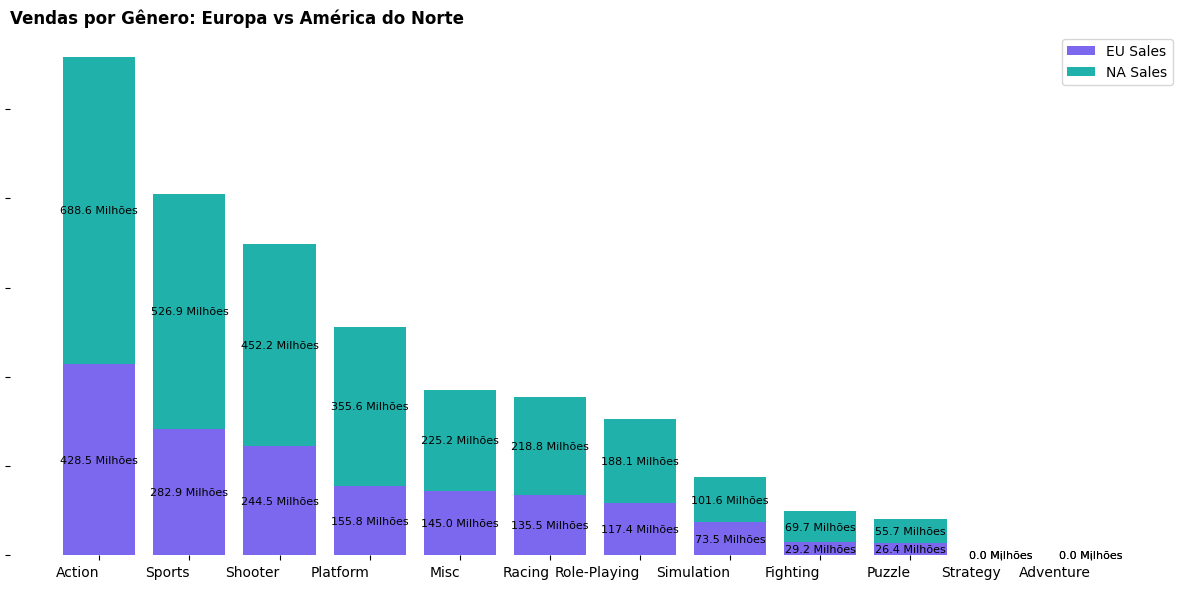

In [ ]:
eu_sales = comparison_sales["EU_Sales"].values
na_sales = comparison_sales["NA_Sales"].values
genre = comparison_sales["Genre"].values

x = np.arange(len(genre))  # Posições no eixo X

fig,ax=plt.subplots(figsize=(12, 6))
# Primeiro, plotamos as barras da Europa
bar1=plt.bar(x, eu_sales, label='EU Sales', color='mediumslateblue')

# Depois, as da América do Norte, empilhadas sobre as da Europa
bar2=plt.bar(x, na_sales, bottom=eu_sales, label='NA Sales', color='lightseagreen')

# Ajustes finais
plt.xticks(x, genre, rotation=0, ha='right')
ax.set_yticklabels([])
plt.ylabel("")
plt.title('Vendas por Gênero: Europa vs América do Norte',fontweight='bold', loc='left')
plt.legend()



def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.1f} Milhões",
            xy=(bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2),  # Aqui estava o erro
            ha="center", va="center", fontsize=8, color="black"
        )
annotate_bars(bar1)
annotate_bars(bar2)

sns.despine(bottom=True,left=True)
plt.tight_layout()
plt.show()

# Agora vamos analisar o japão

#Análise de Vendas no Japão (JP_Sales):
###Principais Gêneros:

O gênero Platform domina as vendas no Japão, com Nintendo liderando em várias categorias.

Role-Playing e Sports são também muito populares, com Nintendo e outras editoras como Square Enix e Konami Digital Entertainment recebendo destaque.

###Top Publishers:

Nintendo é indiscutivelmente a principal editora no Japão, com grandes vendas em múltiplos gêneros como Platform, Role-Playing, Puzzle, Action, etc.

Outras editoras como Square Enix, Namco Bandai Games, Capcom, e Sony Computer Entertainment também têm uma forte presença.

###Insights:

A Nintendo parece ser um gigante no mercado japonês, com uma grande diversidade de jogos nas categorias de Platform, Role-Playing e Sports.

Square Enix e Namco Bandai Games também mostram um portfólio forte em Role-Playing.

| Genre        | Publisher                    | JP\_Sales |
| ------------ | ---------------------------- | --------- |
| Platform     | Nintendo                     | 102.36    |
| Role-Playing | Nintendo                     | 101.95    |
| Misc         | Nintendo                     | 55.25     |
| Sports       | Konami Digital Entertainment | 44.13     |
| Role-Playing | Square Enix                  | 41.44     |


#Documentação – Análise de Vendas por Gênero e Publisher no Japão (Top 50)
Nesta etapa da análise, foi realizada uma investigação sobre os gêneros de jogos mais relevantes no mercado japonês, com base nos dados agregados de vendas (JP_Sales) por gênero e publisher.

###Passos Executados:
Agrupamento dos dados:
Os dados foram agrupados por Genre e Publisher, com a soma das vendas no Japão (JP_Sales) para cada combinação.

#Ordenação e seleção dos top 50:
Foi criada uma nova base contendo as 50 maiores combinações Genre + Publisher em vendas no Japão.

#Contagem dos gêneros mais frequentes entre os Top 50:
A contagem de aparições de cada gênero entre os 50 maiores pares Genre + Publisher no Japão foi a seguinte:

|  Gênero    |  Ocorrências |
| ------------ | -------------- |
| Role-Playing | 14             |
| Action       | 8              |
| Sports       | 7              |
| Fighting     | 6              |
| Platform     | 5              |
| Misc         | 3              |
| Simulation   | 3              |
| Strategy     | 3              |
| Racing       | 2              |
| Adventure    | 2              |
| Puzzle       | 2              |
| Shooter      | 1              |


In [ ]:
df_grouped=df_clean.groupby(["Genre","Publisher"],as_index=False)["JP_Sales"].sum()
df_grouped_sorted=df_grouped.sort_values(by=["JP_Sales"],ascending=False)
top_50_genre_jp=df_grouped_sorted.head(50)
top_50_genre_jp.reset_index(drop=True,inplace=True)
top_50_genre_jp

,Genre,Publisher,JP_Sales
0,Platform,Nintendo,102.36
1,Role-Playing,Nintendo,101.95
2,Misc,Nintendo,55.25
3,Sports,Konami Digital Entertainment,44.13
4,Role-Playing,Square Enix,41.44
5,Puzzle,Nintendo,37.09
6,Role-Playing,SquareSoft,36.45
7,Sports,Nintendo,35.87
8,Role-Playing,Enix Corporation,31.26
9,Racing,Nintendo,29.22


1

#Interpretação:
O gênero Role-Playing (RPG) se destaca fortemente no mercado japonês, com quase 1/3 das posições no ranking.

Jogos de ação e esporte também possuem uma presença significativa.

A diversidade de gêneros mostra uma preferência mais ampla e nichada do público japonês, com títulos de estratégia, simulação e fighting ocupando lugar de destaque.

#Conclusão:
A análise evidencia que o mercado japonês valoriza fortemente o gênero RPG, seguido de jogos de ação, esporte e luta. Isso pode ser associado à cultura local de jogos, que tradicionalmente favorece narrativas profundas, personagens complexos e estilos de jogo táticos.

Caso deseje, posso gerar uma visualização gráfica para essa distribuição por gênero. Deseja isso?






In [ ]:
top_50_genre_jp["Genre"].value_counts()

,count
Genre,
Role-Playing,11
Action,7
Fighting,6
Sports,6
Misc,4
Platform,3
Strategy,3
Simulation,3
Puzzle,2


#Documentação – Comparação de Vendas por Gênero: América do Norte, Europa e Japão
#Objetivo:
Comparar os gêneros mais influentes nas vendas por região (Europa, América do Norte e Japão), com base nos 50 principais pares Genre + Publisher em vendas em cada região.

#Etapas do Código:
Agrupamento Regional por Gênero:

Calculou-se a soma de vendas para cada gênero nas regiões:

EU_Sales: Europa

NA_Sales: América do Norte

JP_Sales: Japão

Criação do DataFrame de Comparação:

Os dados de cada região foram unidos (join) em um único DataFrame com base no gênero.

Faltas foram preenchidas com 0 (fillna(0)), garantindo a uniformidade das comparações.

O resultado foi ordenado pela influência na Europa (coluna EU_Sales), mantendo como critérios secundários as vendas em NA e JP.

#Renomeação de Colunas:

As colunas foram padronizadas para: Genre, EU_Sales, NA_Sales, JP_Sales.

#Resultado:
O DataFrame final, comparison_sales, permite análise direta das preferências de gênero por região. Ele contém:

13 gêneros distintos.

Vendas totais em milhões de unidades para cada região.

Ordenação principal pela performance na Europa, facilitando comparações de impacto regional.



In [ ]:
# verificando o genero mais influente no EU
top_50_eu=top_50_genre.groupby("Genre")["EU_Sales"].sum()
top_50_na=top_50_genre.groupby("Genre")["NA_Sales"].sum()
top_50_jp=top_50_genre_jp.groupby("Genre")["JP_Sales"].sum()

top_50_comparison={
    "EU_Sales":top_50_eu,
    "NA_Sales":top_50_na,
    "JP_Sales":top_50_jp,
}
comparison_sales = top_50_eu.to_frame().join(
    top_50_na.to_frame(), how='outer', lsuffix='_EU', rsuffix='_NA'
).join(
    top_50_jp.to_frame(), how='outer'
).fillna(0).reset_index()

# Renomear as colunas
comparison_sales.columns = ["Genre", "EU_Sales", "NA_Sales", "JP_Sales"]


comparison_sales = comparison_sales.sort_values(by=["EU_Sales", "EU_Sales", "JP_Sales"], ascending=False).reset_index(drop=True)


#Objetivo:
Visualizar e comparar a performance dos gêneros de jogos eletrônicos nas três principais regiões de mercado: Europa (EU), América do Norte (NA) e Japão (JP).

#Descrição Técnica:
Filtro de Gêneros Relevantes:

Foram considerados apenas gêneros com vendas totais maiores que zero em pelo menos uma das regiões.

Preparação dos Dados para o Gráfico:

As vendas por região foram extraídas separadamente e armazenadas em arrays (eu_sales, na_sales, jp_sales).

A variável genre representa os nomes dos gêneros.

Criação do Gráfico de Barras Empilhadas:

Utilizado matplotlib.pyplot para desenhar barras empilhadas:

Barra 1: Europa (EU_Sales) – cor: mediumslateblue

Barra 2: América do Norte (NA_Sales) – empilhada sobre a Europa, cor: lightseagreen

Barra 3: Japão (JP_Sales) – empilhada sobre as anteriores, cor: salmon

Anotações e Legibilidade:

Anotação interna em cada camada da barra com o valor em milhões.

Anotação superior totalizando a soma por gênero.

Legenda adicionada e eixos estilizados para melhor visualização.

#Resultado:
O gráfico mostra de forma clara quais gêneros dominam em cada mercado. Por exemplo:

Action lidera com ampla vantagem no total de vendas.

Role-Playing tem destaque principalmente no Japão.

Platform e Sports se mostram fortes tanto na América do Norte quanto na Europa.



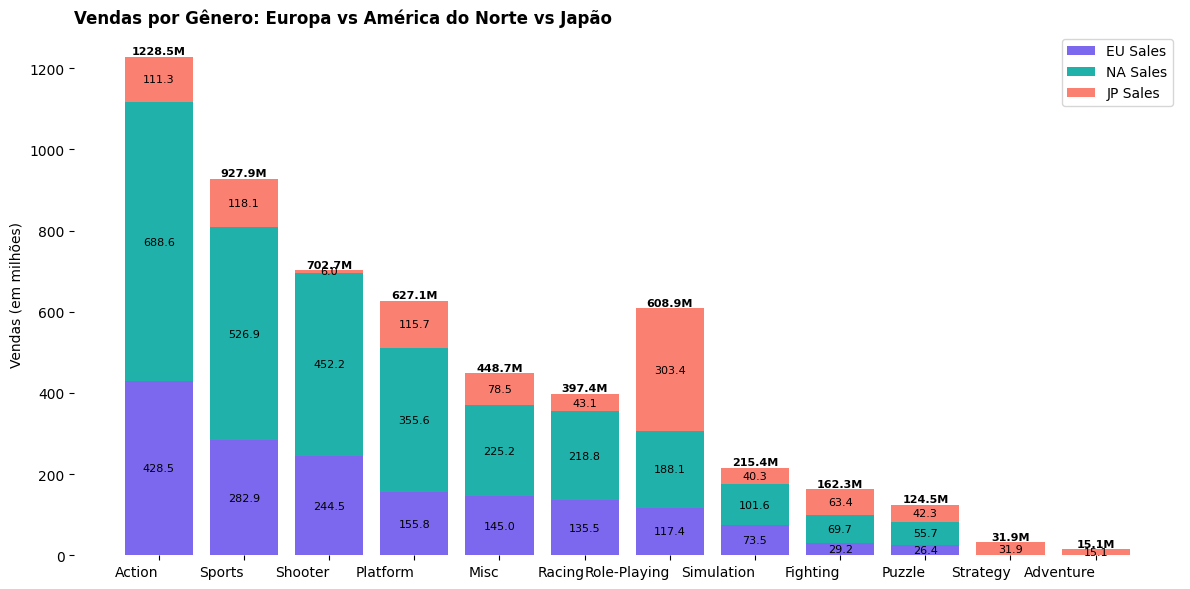

In [ ]:
# Filtrar gêneros com vendas > 0
mask = (comparison_sales[['EU_Sales', 'NA_Sales', 'JP_Sales']].sum(axis=1) > 0)
filtered_df = comparison_sales[mask]

eu_sales = filtered_df["EU_Sales"].values
na_sales = filtered_df["NA_Sales"].values
jp_sales = filtered_df["JP_Sales"].values
genre = filtered_df["Genre"].values

x = np.arange(len(genre))

fig, ax = plt.subplots(figsize=(12, 6))

# Barras empilhadas
bar1 = ax.bar(x, eu_sales, label='EU Sales', color='mediumslateblue')
bar2 = ax.bar(x, na_sales, bottom=eu_sales, label='NA Sales', color='lightseagreen')
bar3 = ax.bar(x, jp_sales, bottom=eu_sales + na_sales, label='JP Sales', color='salmon')

# Rótulos no eixo X
ax.set_xticks(x)
ax.set_xticklabels(genre, rotation=0, ha='right')

ax.set_ylabel("Vendas (em milhões)")
ax.set_title('Vendas por Gênero: Europa vs América do Norte vs Japão', fontweight='bold', loc='left')
ax.legend()

# Função para anotar os valores no centro das barras
def annotate_bars(bars, base_heights):
    for bar, base in zip(bars, base_heights):
        height = bar.get_height()
        if height > 0:
            ax.annotate(f"{height:.1f}",
                        xy=(bar.get_x() + bar.get_width() / 2, base + height / 2),
                        ha="center", va="center", fontsize=8, color="black")

# Anotar valores internos
annotate_bars(bar1, np.zeros_like(eu_sales))
annotate_bars(bar2, eu_sales)
annotate_bars(bar3, eu_sales + na_sales)

# Anotar total no topo
totals = eu_sales + na_sales + jp_sales
for i in range(len(x)):
    ax.annotate(f"{totals[i]:.1f}M",
                xy=(x[i], totals[i] + 1.5),
                ha="center", va="bottom", fontsize=8, fontweight='bold')

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()


In [ ]:
df_influente_vendas=df_clean.sort_values(by="Global_Sales",ascending=False).head(20)
df_influente_vendas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada,Publisher_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010,Conhecida
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990,Conhecida
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010,Conhecida
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010,Conhecida
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000,Conhecida
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980-1990,Conhecida
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000-2010,Conhecida
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2000-2010,Conhecida
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2000-2010,Conhecida
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980-1990,Conhecida


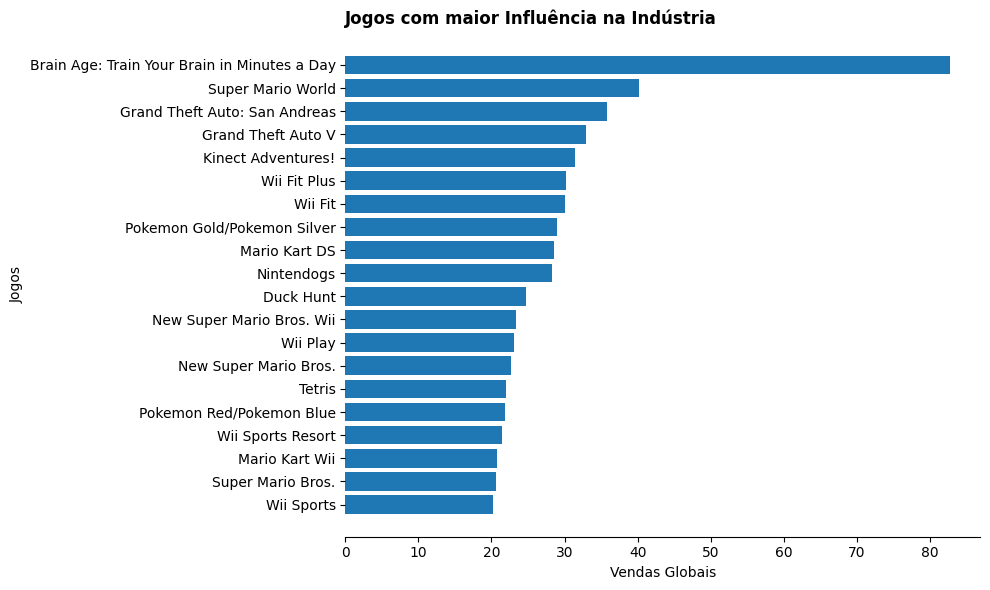

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(df_influente_vendas["Name"],df_influente_vendas["Global_Sales"].sort_values(ascending=True))
plt.title("Jogos com maior Influência na Indústria",fontweight="bold",loc="left")
plt.xlabel("Vendas Globais")
plt.ylabel("Jogos")
plt.tight_layout()
sns.despine(left=True,bottom=False)
plt.show()

In [ ]:
def cateforize_decada(x):
  if x>=1980 and x<1990:
    return "1980-1990"
  elif x>=1990 and x<2000:
    return "1990-2000"
  elif x>=2000 and x<=2010:
    return "2000-2010"
  else:
    return "2010-2020"

In [ ]:
df_clean.loc[:,"Decada"]=df_clean["Year"].apply(cateforize_decada)
df_clean

<ipython-input-39-4f6d2e052491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,"Decada"]=df_clean["Year"].apply(cateforize_decada)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2000-2010
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2000-2010
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2000-2010
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,2000-2010


In [ ]:
decade_counts= df_clean["Decada"].value_counts().sort_index()

In [ ]:
decade_counts = df_clean["Decada"].value_counts().sort_index()
print(decade_counts)

aumento_percentual = {}
decadas = list(decade_counts.index)

for i in range(1, len(decadas)):  # Começando do índice 1
    decada_atual = decadas[i]
    decada_anterior = decadas[i-1]
    count_atual = decade_counts[decada_atual]
    count_anterior = decade_counts[decada_anterior]

    aumento = ((count_atual - count_anterior) / count_anterior) * 100
    aumento_percentual[f"O aumento de {decada_anterior} para {decada_atual}"] = f"{aumento:.2f}%"

print("Aumento Percentual de Jogos Lançados por Década:")
for aumento, porcentagem in aumento_percentual.items():
    print(f"{aumento}: {porcentagem}")

Decada
1980-1990      205
1990-2000     1769
2000-2010    10467
2010-2020     3886
Name: count, dtype: int64
Aumento Percentual de Jogos Lançados por Década:
O aumento de 1980-1990 para 1990-2000: 762.93%
O aumento de 1990-2000 para 2000-2010: 491.69%
O aumento de 2000-2010 para 2010-2020: -62.87%


In [ ]:


# Agrupar por Platform e Publisher, somando as vendas globais
grouped = df_clean.groupby(['Platform', 'Publisher'], as_index=False)['Global_Sales'].sum()

# Para cada plataforma, pegar a publisher com mais vendas
top_publisher_per_platform = grouped.sort_values('Global_Sales', ascending=False).groupby('Platform').head(1)

# Ordenar pelos maiores totais de vendas e pegar os top 20
top_20 = top_publisher_per_platform.sort_values('Global_Sales', ascending=False).head(20)

# Resultado
print(top_20[['Platform', 'Publisher', 'Global_Sales']])


     Platform                    Publisher  Global_Sales
1512      Wii                     Nintendo        390.34
237        DS                     Nintendo        349.10
863       PS2              Electronic Arts        245.96
313        GB                     Nintendo        229.06
777        PS  Sony Computer Entertainment        193.73
525       NES                     Nintendo        183.97
1616     X360              Electronic Arts        177.97
1018      PS3              Electronic Arts        167.09
80        3DS                     Nintendo        156.45
502       N64                     Nintendo        129.62
374       GBA                     Nintendo        112.00
1424     SNES                     Nintendo         96.84
437        GC                     Nintendo         79.15
571        PC              Electronic Arts         71.24
1573     WiiU                     Nintendo         57.90
1703       XB              Electronic Arts         57.43
1108      PS4              Elec

In [ ]:
# Passo 1: lista da ordem
platform_order = ['Wii', 'DS', 'PS2', 'GB', 'PS', 'NES', 'X360', 'PS3', '3DS', 'N64',
                  'GBA', 'SNES', 'GC', 'PC', 'WiiU', 'XB', 'PS4', 'PSP', '2600', 'XOne']

# Passo 2: Filtrando os dados e ordenando por 'Platform' e 'Global_Sales'
df_filtered = df_clean.copy()
df_filtered = df_filtered[df_filtered["Publisher"].isin(["Nintendo", "Electronic Arts", "Sony Computer Entertainment"])]
df_filtered_sorted = df_filtered.sort_values(["Platform", "Global_Sales"], ascending=[True, False])

# Passo 3: Seleciona o top 1 jogo por plataforma (o mais relevante)
top_20_names = df_filtered_sorted.groupby("Platform").head(1)

# Passo 4: Removendo as colunas desnecessárias
top_20_names = top_20_names.drop(columns=["Year", "Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Rank"])

# Passo 5: Reorganizando
top_20_names['Platform'] = pd.Categorical(top_20_names['Platform'], categories=platform_order, ordered=True)
top_20_names = top_20_names.sort_values('Platform')

top_20_names=top_20_names.dropna()
top_20_names

,Name,Platform,Publisher,Global_Sales,Decada
0,Wii Sports,Wii,Nintendo,82.74,2000-2010
6,New Super Mario Bros.,DS,Nintendo,30.01,2000-2010
28,Gran Turismo 3: A-Spec,PS2,Sony Computer Entertainment,14.98,2000-2010
4,Pokemon Red/Pokemon Blue,GB,Nintendo,31.37,1990-2000
52,Gran Turismo,PS,Sony Computer Entertainment,10.95,1990-2000
1,Super Mario Bros.,NES,Nintendo,40.24,1980-1990
99,Battlefield 3,X360,Electronic Arts,7.34,2010-2020
54,Gran Turismo 5,PS3,Sony Computer Entertainment,10.77,2000-2010
32,Pokemon X/Pokemon Y,3DS,Nintendo,14.35,2010-2020
46,Super Mario 64,N64,Nintendo,11.89,1990-2000


In [ ]:
publisher_counts=top_20_names["Publisher"].value_counts()
nintendo_counts=publisher_counts["Nintendo"]
eletronic_counts=publisher_counts["Electronic Arts"]
sony_counts=publisher_counts["Sony Computer Entertainment"]
sizes=[nintendo_counts,eletronic_counts,sony_counts]
labels=["Nintendo","Electronic Arts","Sony Computer Entertainment"]
colors=["cyan","purple","orange"]

In [ ]:
print("Fazer um grafico de pizza reprensentandio")

Fazer um grafico de pizza reprensentandio


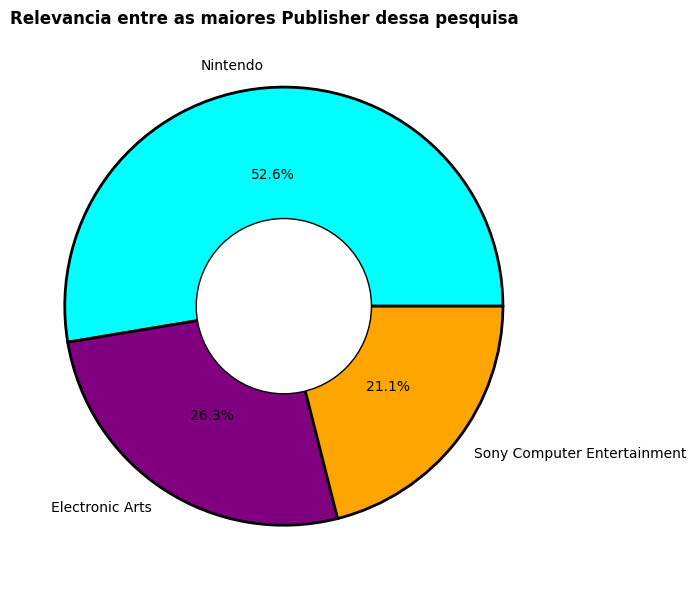

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

plt.pie(sizes,colors=colors,labels=labels,autopct="%1.1f%%",wedgeprops={
    "linewidth":2,
    "edgecolor":"black"
})
center_circle=plt.Circle((0,0),0.4,fc="white",ec="black")
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Relevancia entre as maiores Publisher dessa pesquisa",fontsize=12,fontweight="bold",loc="left")
plt.tight_layout()
plt.show()

In [ ]:
platform_publisher_sales=df_clean.groupby(["Platform","Publisher"])["Global_Sales"].sum().sort_values(ascending=False).head(20).reset_index()
platform_publisher_sales


,Platform,Publisher,Global_Sales
0,Wii,Nintendo,390.34
1,DS,Nintendo,349.10
2,PS2,Electronic Arts,245.96
3,GB,Nintendo,229.06
4,PS,Sony Computer Entertainment,193.73
5,NES,Nintendo,183.97
6,X360,Electronic Arts,177.97
7,PS2,Sony Computer Entertainment,172.80
8,PS3,Electronic Arts,167.09
9,X360,Microsoft Game Studios,165.16


## Vamos analisar o ciclo de vida das plataformas


In [ ]:
df_clean.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000


In [ ]:
platform_life_cycle=df_clean.groupby("Platform")["Year"].agg(["min","max"]).reset_index()
platform_life_cycle.columns=["Platform","Ano Lançamento","Ano de Descontinuação"]
platform_life_cycle["Tempo de Vida"]=platform_life_cycle["Ano de Descontinuação"]-platform_life_cycle["Ano Lançamento"]
platform_life_cycle=platform_life_cycle.sort_values(by="Tempo de Vida",ascending=False)
platform_life_cycle=platform_life_cycle.reset_index(drop=True)
platform_life_cycle

,Platform,Ano Lançamento,Ano de Descontinuação,Tempo de Vida
0,DS,1985,2020,35
1,PC,1985,2016,31
2,GB,1988,2001,13
3,NES,1983,1994,11
4,X360,2005,2016,11
5,PSP,2004,2015,11
6,PS2,2000,2011,11
7,PS3,2006,2016,10
8,DC,1998,2008,10
9,Wii,2006,2015,9


In [ ]:
platform_life_cycle[["Platform", "Ano Lançamento", "Ano de Descontinuação"]].isnull().sum()


,0
Platform,0
Ano Lançamento,0
Ano de Descontinuação,0


In [ ]:
# Exemplo: manter apenas as top 10 por tempo de vida
platform_life_cycle["Tempo de Vida"] = platform_life_cycle["Ano de Descontinuação"] - platform_life_cycle["Ano Lançamento"]
platform_life_cycle = platform_life_cycle.sort_values("Tempo de Vida", ascending=False).head(10)


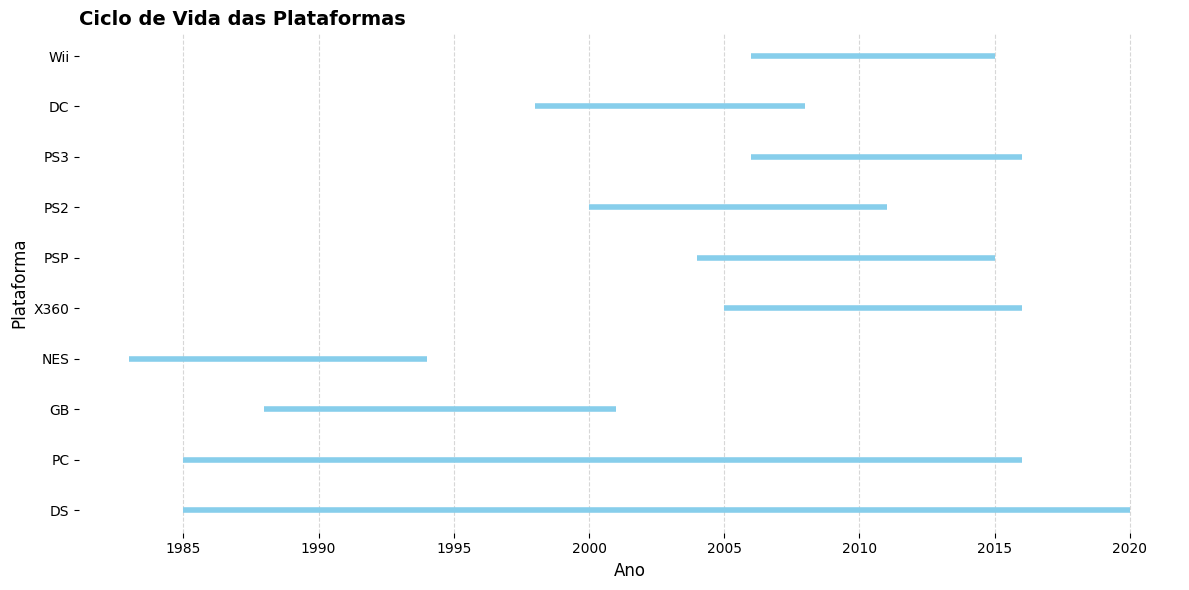

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Traçar cada linha
for _, row in platform_life_cycle.iterrows():
    ax.hlines(
        y=row["Platform"],
        xmin=row["Ano Lançamento"],
        xmax=row["Ano de Descontinuação"],
        color="skyblue",
        linewidth=4
    )

# Estética
ax.set_xlabel("Ano", fontsize=12)
ax.set_ylabel("Plataforma", fontsize=12)
ax.set_title("Ciclo de Vida das Plataformas", fontweight="bold", loc="left", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


## quais gêneros mais vendem em cada plataforma

In [ ]:
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000


In [ ]:
vendas_por_genero_plat=df_clean.groupby(["Platform","Genre"])["Global_Sales"].sum().reset_index()
vendas_por_genero_plat

,Platform,Genre,Global_Sales
0,2600,Action,26.39
1,2600,Adventure,0.40
2,2600,Fighting,0.77
3,2600,Misc,3.58
4,2600,Platform,13.27
...,...,...,...
288,XOne,Role-Playing,9.48
289,XOne,Shooter,51.61
290,XOne,Simulation,0.54
291,XOne,Sports,23.97


In [ ]:
melhor_genero_por_plat=vendas_por_genero_plat.sort_values(by="Global_Sales",ascending=False).drop_duplicates("Platform")
melhor_genero_por_plat=melhor_genero_por_plat.sort_values(by="Global_Sales",ascending=True)
melhor_genero_por_plat

,Platform,Genre,Global_Sales
128,PCFX,Role-Playing,0.03
91,GG,Platform,0.04
10,3DO,Adventure,0.06
230,TG16,Adventure,0.14
232,WS,Role-Playing,1.22
114,NG,Fighting,1.42
214,SCD,Platform,1.50
33,DC,Sports,3.66
203,SAT,Fighting,8.52
85,GEN,Platform,15.45


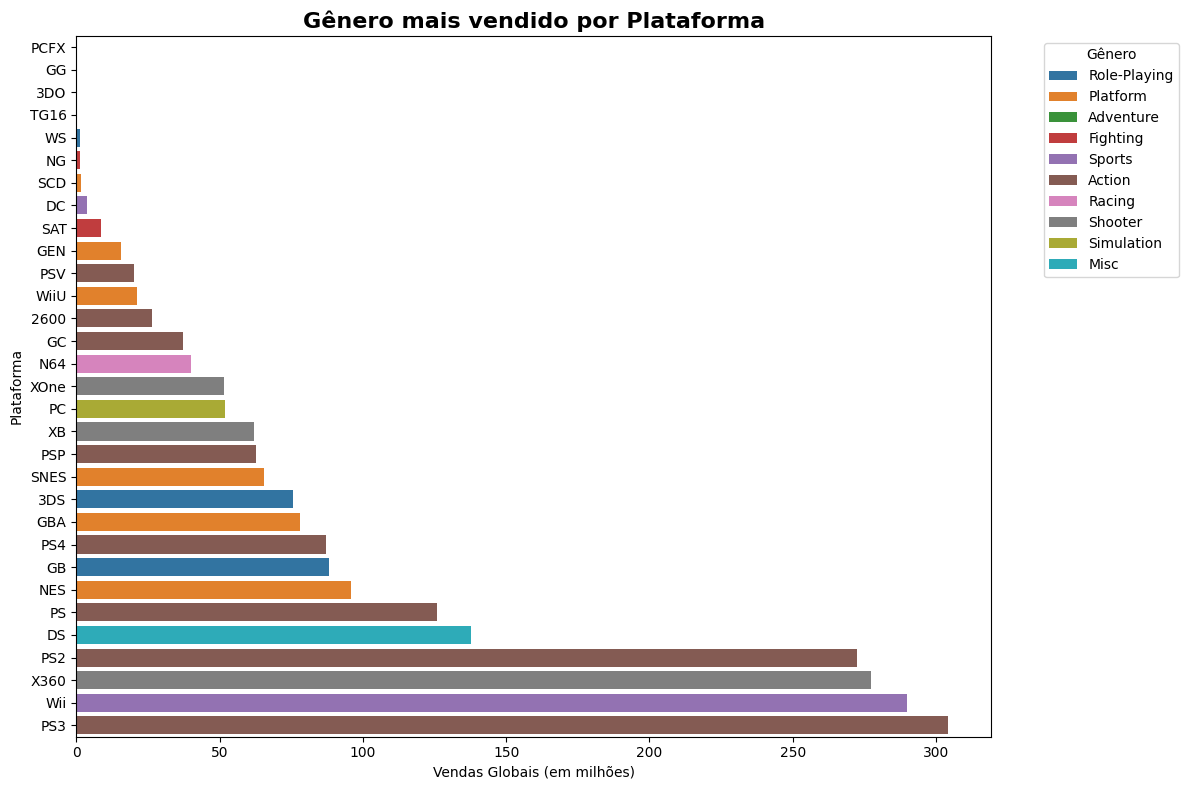

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=melhor_genero_por_plat,
    x="Global_Sales",
    y="Platform",
    hue="Genre",
    dodge=False
)
plt.title('Gênero mais vendido por Plataforma', fontsize=16, fontweight='bold')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Plataforma')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Ótimo! Vamos analisar o impacto de publishers conhecidos vs. desconhecidos nas vendas globais, usando o df_clean como base

In [ ]:
# Publishers que lançaram mais de 50 jogos serão consideradas conhecidas
conhecidas = df_clean['Publisher'].value_counts()
conhecidas = conhecidas[conhecidas > 50].index


In [ ]:
# Cria uma nova coluna categorizando se o publisher é 'Conhecida' ou 'Desconhecida'
df_clean['Publisher_Type'] = df_clean['Publisher'].apply(
    lambda x: 'Conhecida' if x in conhecidas else 'Desconhecida'
)
df_clean

<ipython-input-58-3e734c2a85b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Publisher_Type'] = df_clean['Publisher'].apply(


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada,Publisher_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010,Conhecida
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990,Conhecida
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010,Conhecida
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010,Conhecida
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000,Conhecida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2000-2010,Desconhecida
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2000-2010,Conhecida
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2000-2010,Conhecida
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,2000-2010,Desconhecida


In [ ]:
# Agrupa e soma as vendas globais por tipo de publisher
vendas_por_tipo = df_clean.groupby('Publisher_Type')['Global_Sales'].sum().reset_index()
vendas_por_tipo


,Publisher_Type,Global_Sales
0,Conhecida,8170.91
1,Desconhecida,649.45


<ipython-input-60-65c565970135>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_tipo, x='Publisher_Type', y='Global_Sales', palette='Set2')


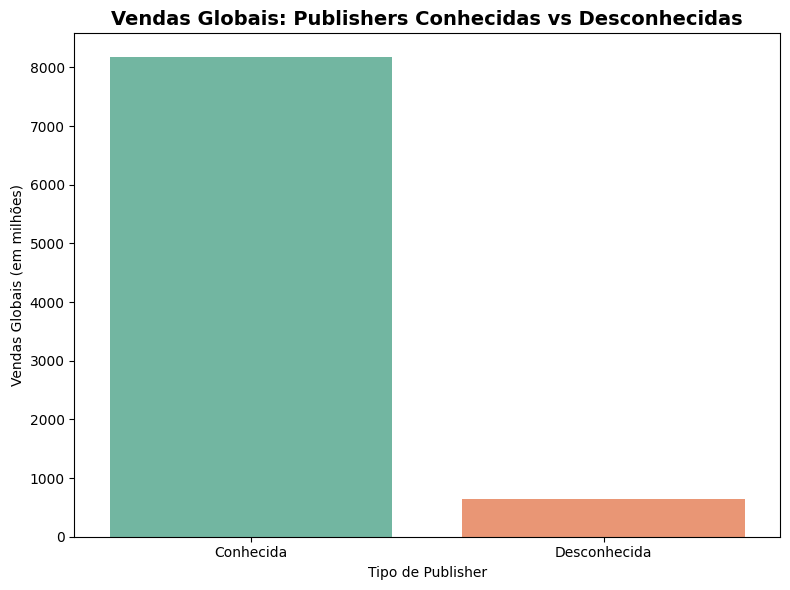

In [ ]:

plt.figure(figsize=(8,6))
sns.barplot(data=vendas_por_tipo, x='Publisher_Type', y='Global_Sales', palette='Set2')

plt.title('Vendas Globais: Publishers Conhecidas vs Desconhecidas', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Publisher')
plt.ylabel('Vendas Globais (em milhões)')
plt.tight_layout()
plt.show()


# ✅ Conclusões Gerais
Área Analisada	Resultado Principal
Vendas regionais	NA e EU dominam. JP tem peso mais baixo.

Décadas	Pico de lançamentos foi em 2000-2010.

Gêneros por região	Ação, Esportes, e Shooter dominam EU e NA; RPG domina JP.

Plataformas	Consoles da Nintendo dominaram por longevidade e vendas.

Publisher vs. Vendas	Publishers conhecidas vendem mais, mas desconhecidas também têm impacto.